In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('D:/DATA SCIENCE/DS ML Files/Final_Data_For_Analysis - Copy.csv')
data.head()

,S.No.,States/UTs,Number of hospitals in public sector,Number of hospitals in private sector,Total number of hospitals (public + private),Number of hospitals beds in public sector,Number of hospitals in beds private sector,Total number of hospitals beds (public + private),Number of ICU beds in public sector,Number of ICU beds in private sector,...,Number of ventilators in public sector,Number of ventilators in private sector,Total number of Ventilators (public + private),Confirmed Cases,Deceased,Tested (L.),Vaccinated (At least one dose) (L.),Fully Vaccinated (L.),Vaccine Doses Administered (L.),Population (L.)
0,1,Andaman Nicobar Island,30,6,36,1075,219,1294,54,11,...,27,5,32,7651,129,6.0,2.9,2.0,4.9,4.0
1,2,Andhra Pradesh,258,670,928,23138,60092,83230,1157,3005,...,578,1502,2080,2066450,14373,300.0,330.0,200.0,530.0,520.0
2,3,Arunachal Pradesh,218,20,238,2404,220,2624,120,11,...,60,6,66,55155,280,11.9,7.7,5.3,13.1,15.0
3,4,Assam,1226,503,1729,17142,7036,24178,857,352,...,429,176,605,610645,5997,250.0,200.0,80.7,280.0,340.0
4,5,Bihar,1147,1887,3034,11664,19193,30857,583,960,...,292,480,772,726098,9661,510.0,500.0,180.0,680.0,1200.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 21 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   S.No.                                               37 non-null     int64  
 1   States/UTs                                          37 non-null     object 
 2   Number of hospitals in public sector                37 non-null     int64  
 3   Number of hospitals in private sector               37 non-null     int64  
 4   Total number of hospitals (public + private)        37 non-null     int64  
 5   Number of hospitals beds in public sector           37 non-null     int64  
 6   Number of hospitals in beds private sector          37 non-null     int64  
 7   Total number of hospitals beds (public + private)   37 non-null     int64  
 8   Number of ICU beds in public sector                 37 non-null     int64  
 9   N

In [4]:
data.dtypes

S.No.                                                   int64
States/UTs                                             object
Number of hospitals in public sector                    int64
Number of hospitals in private sector                   int64
Total number of hospitals (public + private)            int64
Number of hospitals beds in public sector               int64
Number of hospitals in beds private sector              int64
Total number of hospitals beds (public + private)       int64
Number of ICU beds in public sector                     int64
Number of ICU beds in private sector                    int64
Total number of ICU beds (public + private)             int64
Number of ventilators in public sector                  int64
Number of ventilators in private sector                 int64
Total number of Ventilators (public + private)          int64
Confirmed Cases                                         int64
Deceased                                                int64
Tested (

In [5]:
data.isnull().sum()

S.No.                                                 0
States/UTs                                            0
Number of hospitals in public sector                  0
Number of hospitals in private sector                 0
Total number of hospitals (public + private)          0
Number of hospitals beds in public sector             0
Number of hospitals in beds private sector            0
Total number of hospitals beds (public + private)     0
Number of ICU beds in public sector                   0
Number of ICU beds in private sector                  0
Total number of ICU beds (public + private)           0
Number of ventilators in public sector                0
Number of ventilators in private sector               0
Total number of Ventilators (public + private)        0
Confirmed Cases                                       0
Deceased                                              0
Tested (L.)                                           0
Vaccinated (At least one dose) (L.)             

In [6]:
df=data
df.head()

,S.No.,States/UTs,Number of hospitals in public sector,Number of hospitals in private sector,Total number of hospitals (public + private),Number of hospitals beds in public sector,Number of hospitals in beds private sector,Total number of hospitals beds (public + private),Number of ICU beds in public sector,Number of ICU beds in private sector,...,Number of ventilators in public sector,Number of ventilators in private sector,Total number of Ventilators (public + private),Confirmed Cases,Deceased,Tested (L.),Vaccinated (At least one dose) (L.),Fully Vaccinated (L.),Vaccine Doses Administered (L.),Population (L.)
0,1,Andaman Nicobar Island,30,6,36,1075,219,1294,54,11,...,27,5,32,7651,129,6.0,2.9,2.0,4.9,4.0
1,2,Andhra Pradesh,258,670,928,23138,60092,83230,1157,3005,...,578,1502,2080,2066450,14373,300.0,330.0,200.0,530.0,520.0
2,3,Arunachal Pradesh,218,20,238,2404,220,2624,120,11,...,60,6,66,55155,280,11.9,7.7,5.3,13.1,15.0
3,4,Assam,1226,503,1729,17142,7036,24178,857,352,...,429,176,605,610645,5997,250.0,200.0,80.7,280.0,340.0
4,5,Bihar,1147,1887,3034,11664,19193,30857,583,960,...,292,480,772,726098,9661,510.0,500.0,180.0,680.0,1200.0


In [7]:
df.columns

Index(['S.No.', 'States/UTs', 'Number of hospitals in public sector',
       'Number of hospitals in private sector',
       'Total number of hospitals (public + private) ',
       'Number of hospitals beds in public sector',
       'Number of hospitals in beds private sector',
       'Total number of hospitals beds (public + private) ',
       'Number of ICU beds in public sector',
       'Number of ICU beds in private sector',
       'Total number of ICU beds (public + private) ',
       'Number of ventilators in public sector',
       'Number of ventilators in private sector',
       'Total number of Ventilators (public + private) ', 'Confirmed Cases',
       'Deceased ', 'Tested (L.)', 'Vaccinated (At least one dose) (L.)',
       'Fully Vaccinated (L.)', 'Vaccine Doses Administered (L.)',
       'Population (L.)'],
      dtype='object')

In [8]:
# For uniformity converting in Lakhs
df['Confirmed Cases']=df['Confirmed Cases']*(1/100000)
df.head()

,S.No.,States/UTs,Number of hospitals in public sector,Number of hospitals in private sector,Total number of hospitals (public + private),Number of hospitals beds in public sector,Number of hospitals in beds private sector,Total number of hospitals beds (public + private),Number of ICU beds in public sector,Number of ICU beds in private sector,...,Number of ventilators in public sector,Number of ventilators in private sector,Total number of Ventilators (public + private),Confirmed Cases,Deceased,Tested (L.),Vaccinated (At least one dose) (L.),Fully Vaccinated (L.),Vaccine Doses Administered (L.),Population (L.)
0,1,Andaman Nicobar Island,30,6,36,1075,219,1294,54,11,...,27,5,32,0.07651,129,6.0,2.9,2.0,4.9,4.0
1,2,Andhra Pradesh,258,670,928,23138,60092,83230,1157,3005,...,578,1502,2080,20.66450,14373,300.0,330.0,200.0,530.0,520.0
2,3,Arunachal Pradesh,218,20,238,2404,220,2624,120,11,...,60,6,66,0.55155,280,11.9,7.7,5.3,13.1,15.0
3,4,Assam,1226,503,1729,17142,7036,24178,857,352,...,429,176,605,6.10645,5997,250.0,200.0,80.7,280.0,340.0
4,5,Bihar,1147,1887,3034,11664,19193,30857,583,960,...,292,480,772,7.26098,9661,510.0,500.0,180.0,680.0,1200.0


In [9]:
df1=df[['States/UTs', 'Number of hospitals in public sector',
       'Number of hospitals in private sector',
       'Total number of hospitals (public + private) ']]
df1.head(10)

,States/UTs,Number of hospitals in public sector,Number of hospitals in private sector,Total number of hospitals (public + private)
0,Andaman Nicobar Island,30,6,36
1,Andhra Pradesh,258,670,928
2,Arunachal Pradesh,218,20,238
3,Assam,1226,503,1729
4,Bihar,1147,1887,3034
5,Chhattisgarh,214,182,396
6,Chnadigarh,9,4,13
7,Dadra & N Haveli,12,6,18
8,Daman & Diu,5,21,26
9,Delhi,109,67,176


Visualizing the data. State/UTs wise representation of different columns will give 
us an idea of the overall situation in different states

<AxesSubplot:title={'center':'State Wise Total No of Hospitals'}, xlabel='States/UTs', ylabel='No of Hospitals'>

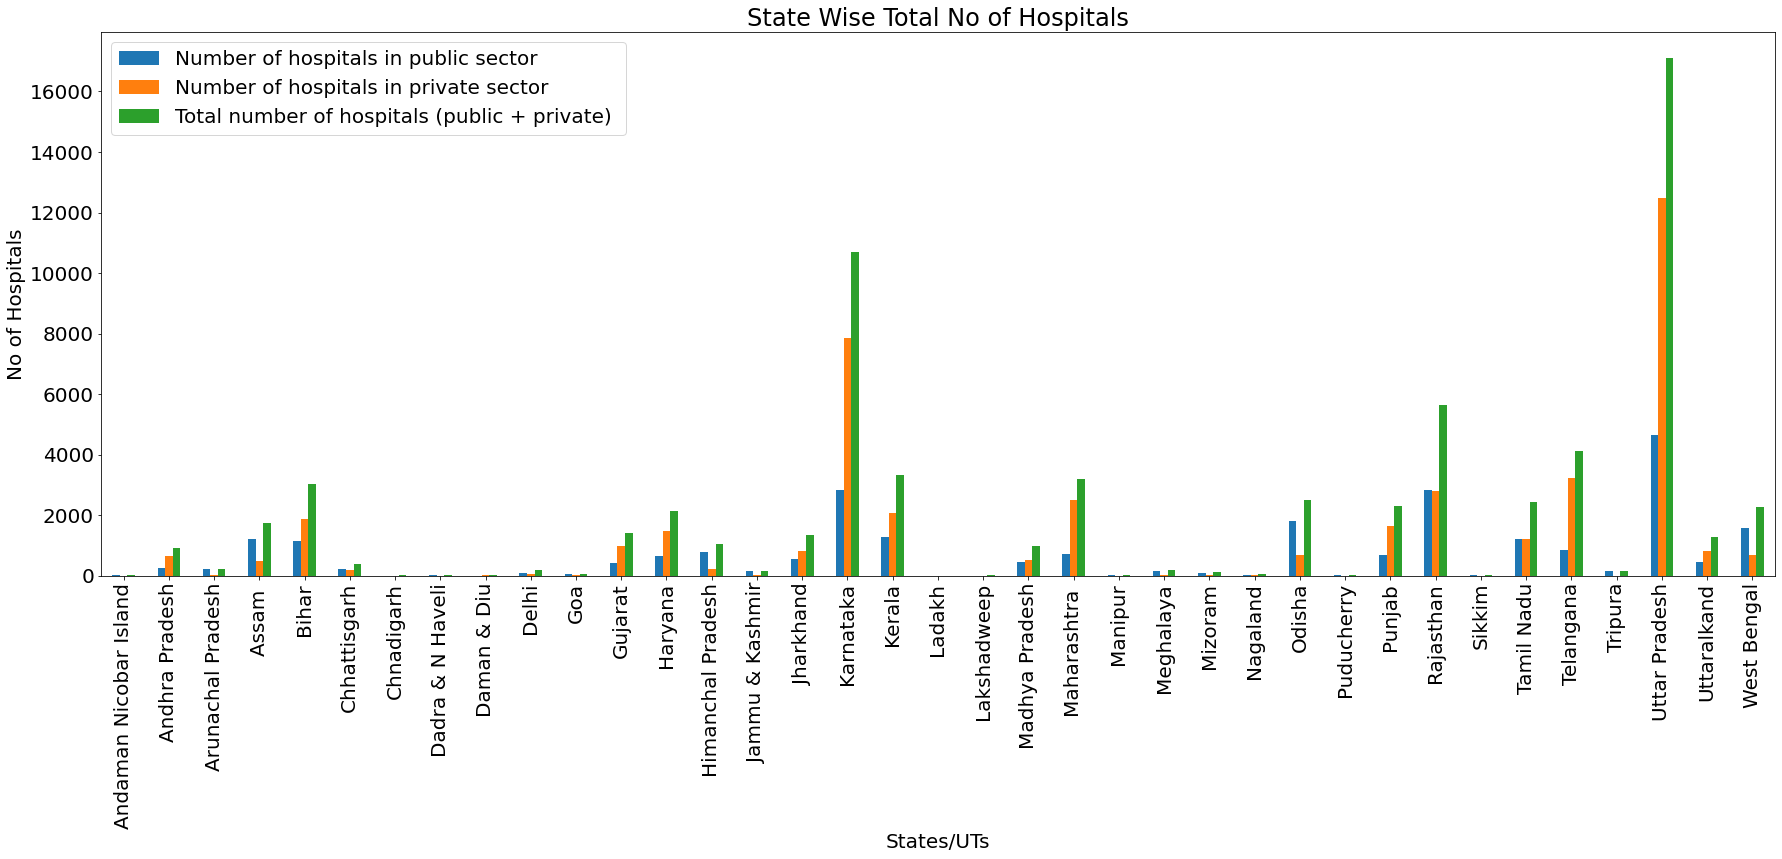

In [10]:
plt.rcParams.update({'font.size': 20})
df1.plot.bar(x='States/UTs',xlabel='States/UTs',ylabel='No of Hospitals',title='State Wise Total No of Hospitals',figsize=(30,10))

In [11]:
df2=df[['States/UTs', 'Number of hospitals beds in public sector',
       'Number of hospitals in beds private sector',
       'Total number of hospitals beds (public + private) ']]
df2.head(10)

,States/UTs,Number of hospitals beds in public sector,Number of hospitals in beds private sector,Total number of hospitals beds (public + private)
0,Andaman Nicobar Island,1075,219,1294
1,Andhra Pradesh,23138,60092,83230
2,Arunachal Pradesh,2404,220,2624
3,Assam,17142,7036,24178
4,Bihar,11664,19193,30857
5,Chhattisgarh,9412,8018,17430
6,Chnadigarh,3756,1875,5631
7,Dadra & N Haveli,619,322,941
8,Daman & Diu,240,1010,1250
9,Delhi,24383,15072,39455


<AxesSubplot:title={'center':'State Wise Total No of Hospitals beds'}, xlabel='States/UTs', ylabel='No of Hospital Beds'>

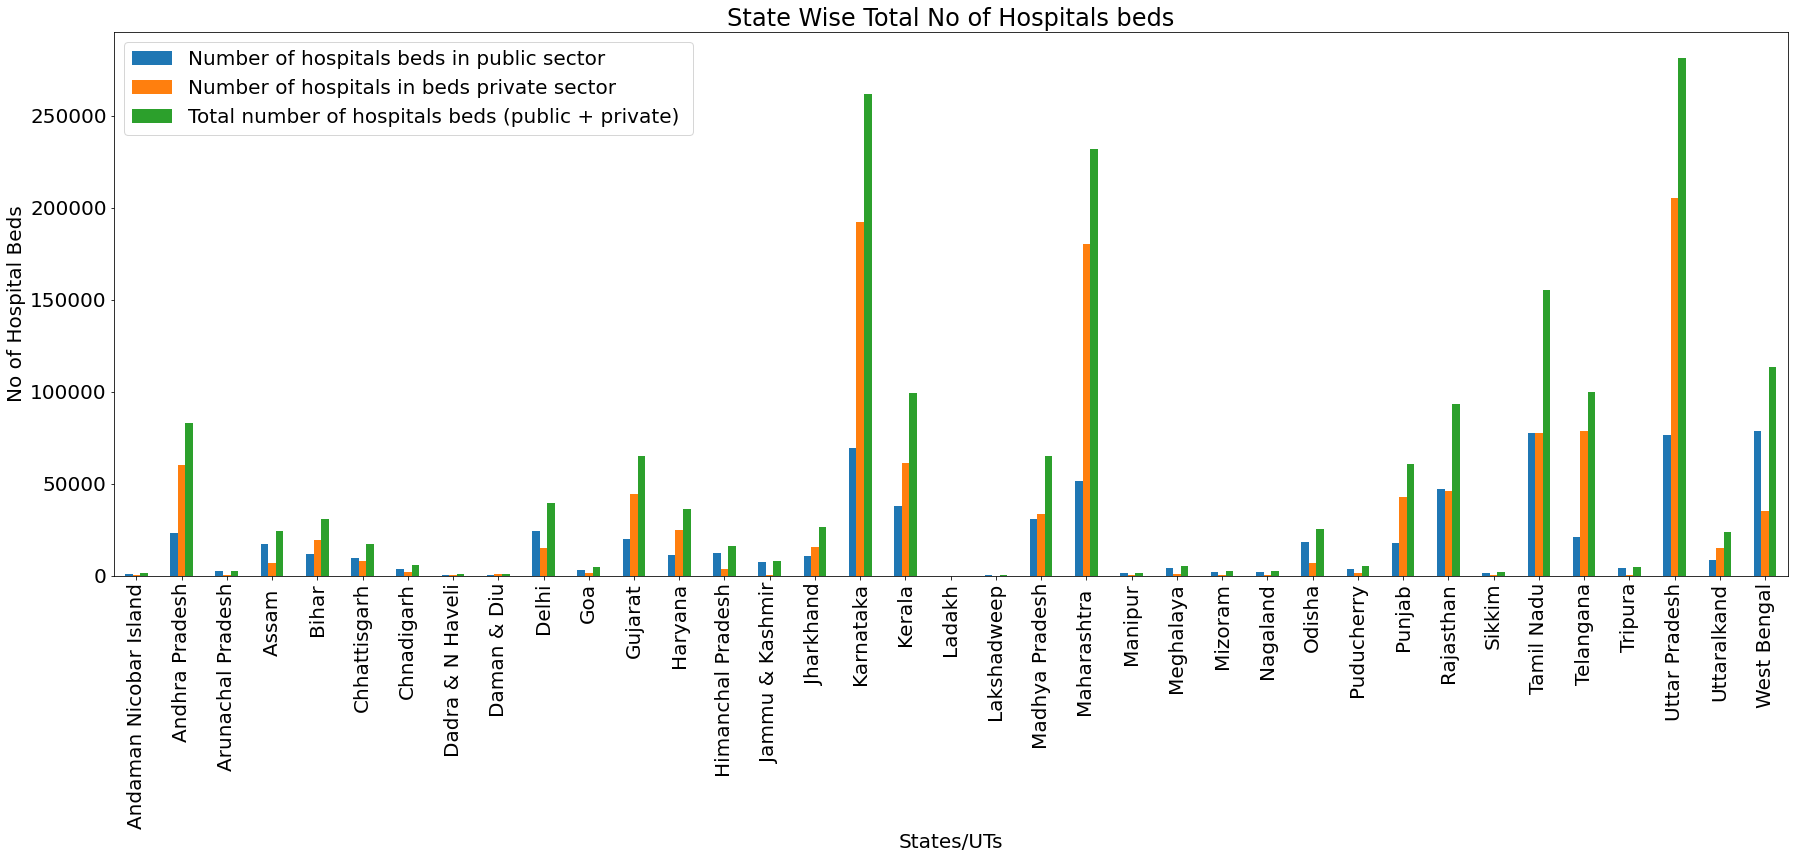

In [12]:
plt.rcParams.update({'font.size': 20})
df2.plot.bar(x='States/UTs',xlabel='States/UTs',ylabel='No of Hospital Beds',title='State Wise Total No of Hospitals beds',figsize=(30,10))

In [13]:
df3=df[['States/UTs', 'Number of ICU beds in public sector',
       'Number of ICU beds in private sector',
       'Total number of ICU beds (public + private) ']]
df3.head(10)

,States/UTs,Number of ICU beds in public sector,Number of ICU beds in private sector,Total number of ICU beds (public + private)
0,Andaman Nicobar Island,54,11,65
1,Andhra Pradesh,1157,3005,4162
2,Arunachal Pradesh,120,11,131
3,Assam,857,352,1209
4,Bihar,583,960,1543
5,Chhattisgarh,471,401,872
6,Chnadigarh,188,94,282
7,Dadra & N Haveli,31,16,47
8,Daman & Diu,12,51,63
9,Delhi,1219,754,1973


<AxesSubplot:title={'center':'State Wise Total No of ICU beds'}, xlabel='States/UTs', ylabel='No of ICU Beds'>

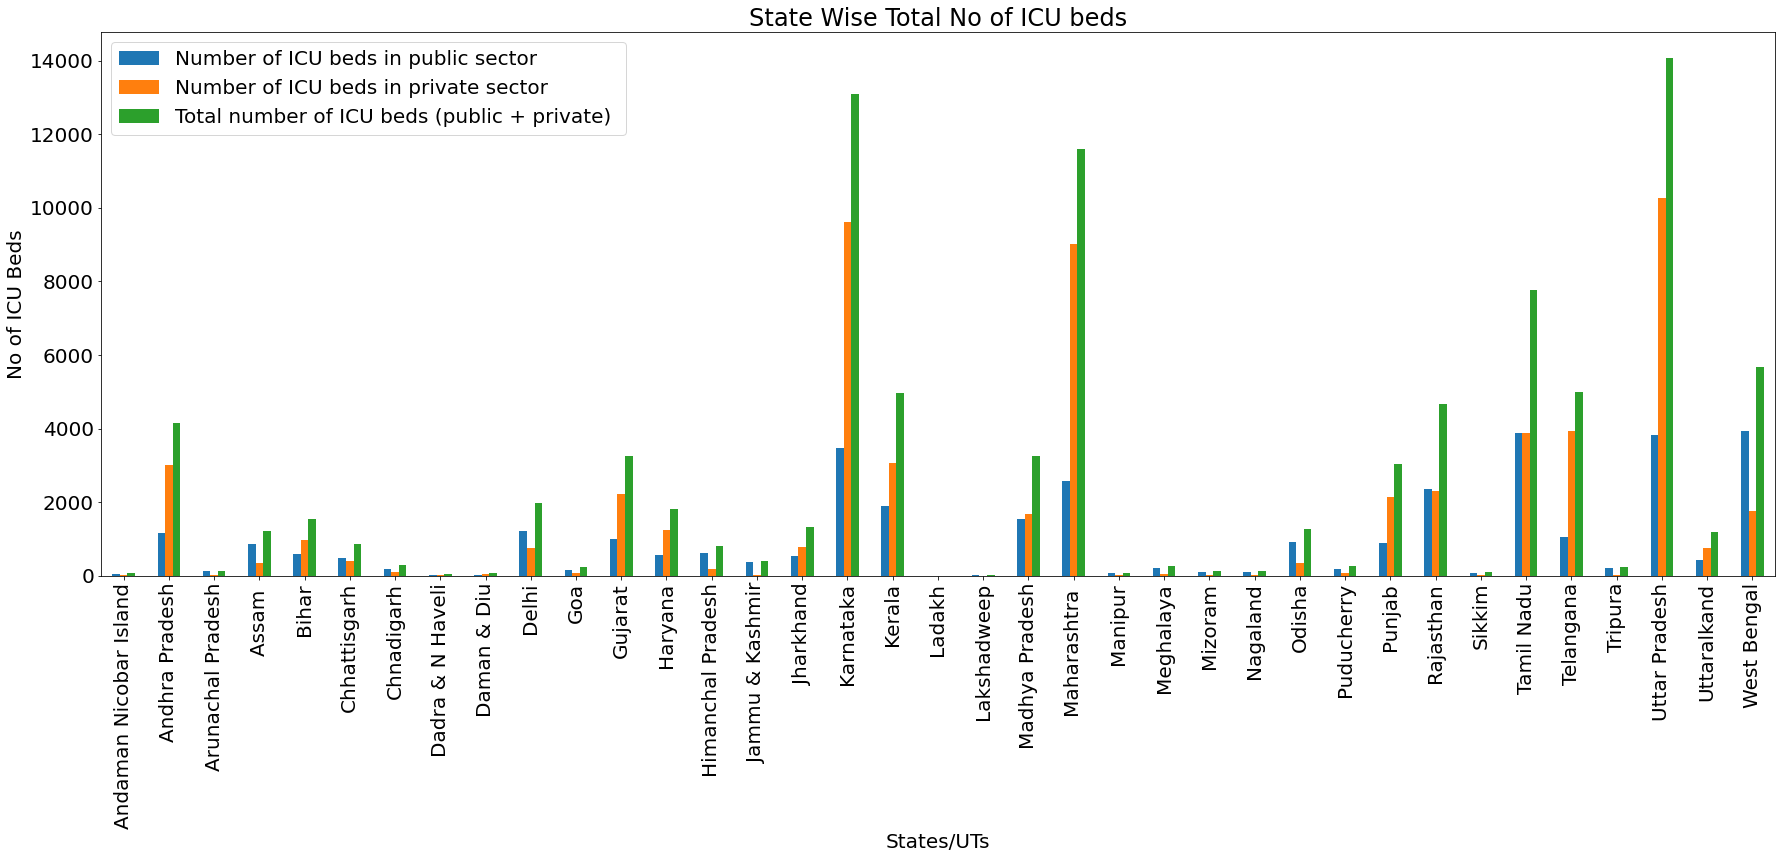

In [14]:
plt.rcParams.update({'font.size': 20})
df3.plot.bar(x='States/UTs',xlabel='States/UTs',ylabel='No of ICU Beds',title='State Wise Total No of ICU beds',figsize=(30,10))

In [15]:
df4=df[['States/UTs', 'Number of ventilators in public sector',
       'Number of ventilators in private sector',
       'Total number of Ventilators (public + private) ']]
df4.head(10)

,States/UTs,Number of ventilators in public sector,Number of ventilators in private sector,Total number of Ventilators (public + private)
0,Andaman Nicobar Island,27,5,32
1,Andhra Pradesh,578,1502,2080
2,Arunachal Pradesh,60,6,66
3,Assam,429,176,605
4,Bihar,292,480,772
5,Chhattisgarh,235,200,435
6,Chnadigarh,94,47,141
7,Dadra & N Haveli,15,8,23
8,Daman & Diu,6,25,31
9,Delhi,610,377,987


<AxesSubplot:title={'center':'State Wise Total No of ventilators'}, xlabel='States/UTs', ylabel='No of ventilators'>

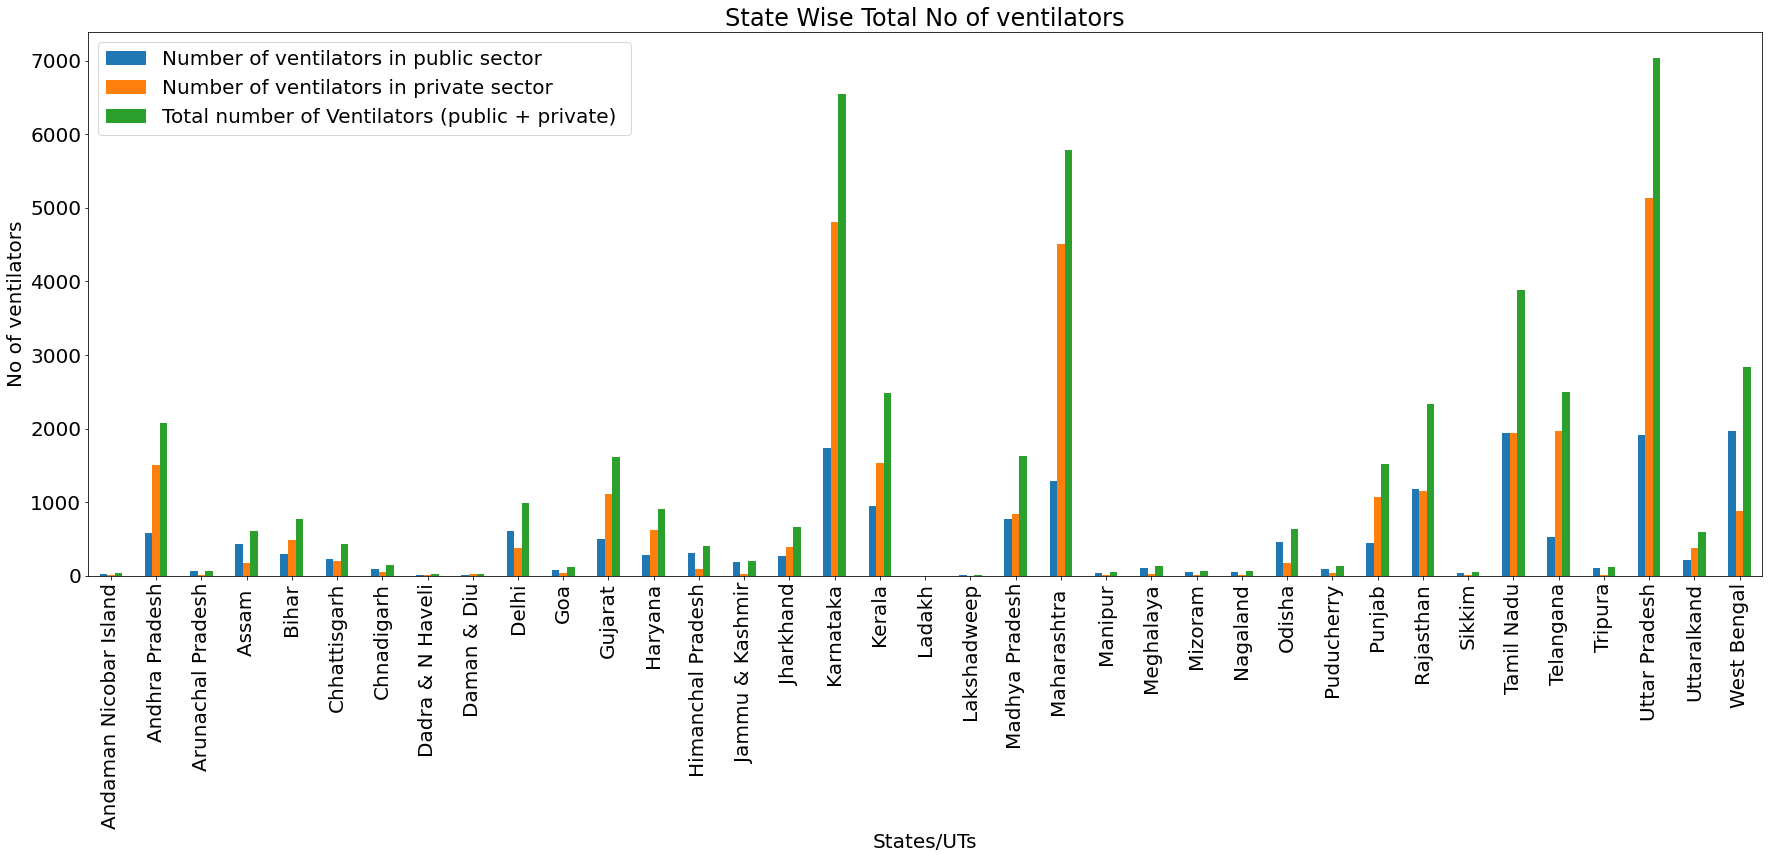

In [16]:
plt.rcParams.update({'font.size': 20})
df4.plot.bar(x='States/UTs',xlabel='States/UTs',ylabel='No of ventilators',title='State Wise Total No of ventilators',figsize=(30,10))

In [17]:
df5=df[['States/UTs', 'Confirmed Cases','Tested (L.)']]
df5.head(10)

,States/UTs,Confirmed Cases,Tested (L.)
0,Andaman Nicobar Island,0.07651,6.0
1,Andhra Pradesh,20.66450,300.0
2,Arunachal Pradesh,0.55155,11.9
3,Assam,6.10645,250.0
4,Bihar,7.26098,510.0
5,Chhattisgarh,0.65351,7.9
6,Chnadigarh,10.06052,140.0
7,Dadra & N Haveli,0.10681,0.0
8,Daman & Diu,0.00000,0.0
9,Delhi,14.39870,290.0


<AxesSubplot:title={'center':'State Wise Cases'}, xlabel='States/UTs', ylabel='Tested & Confirmed Cases'>

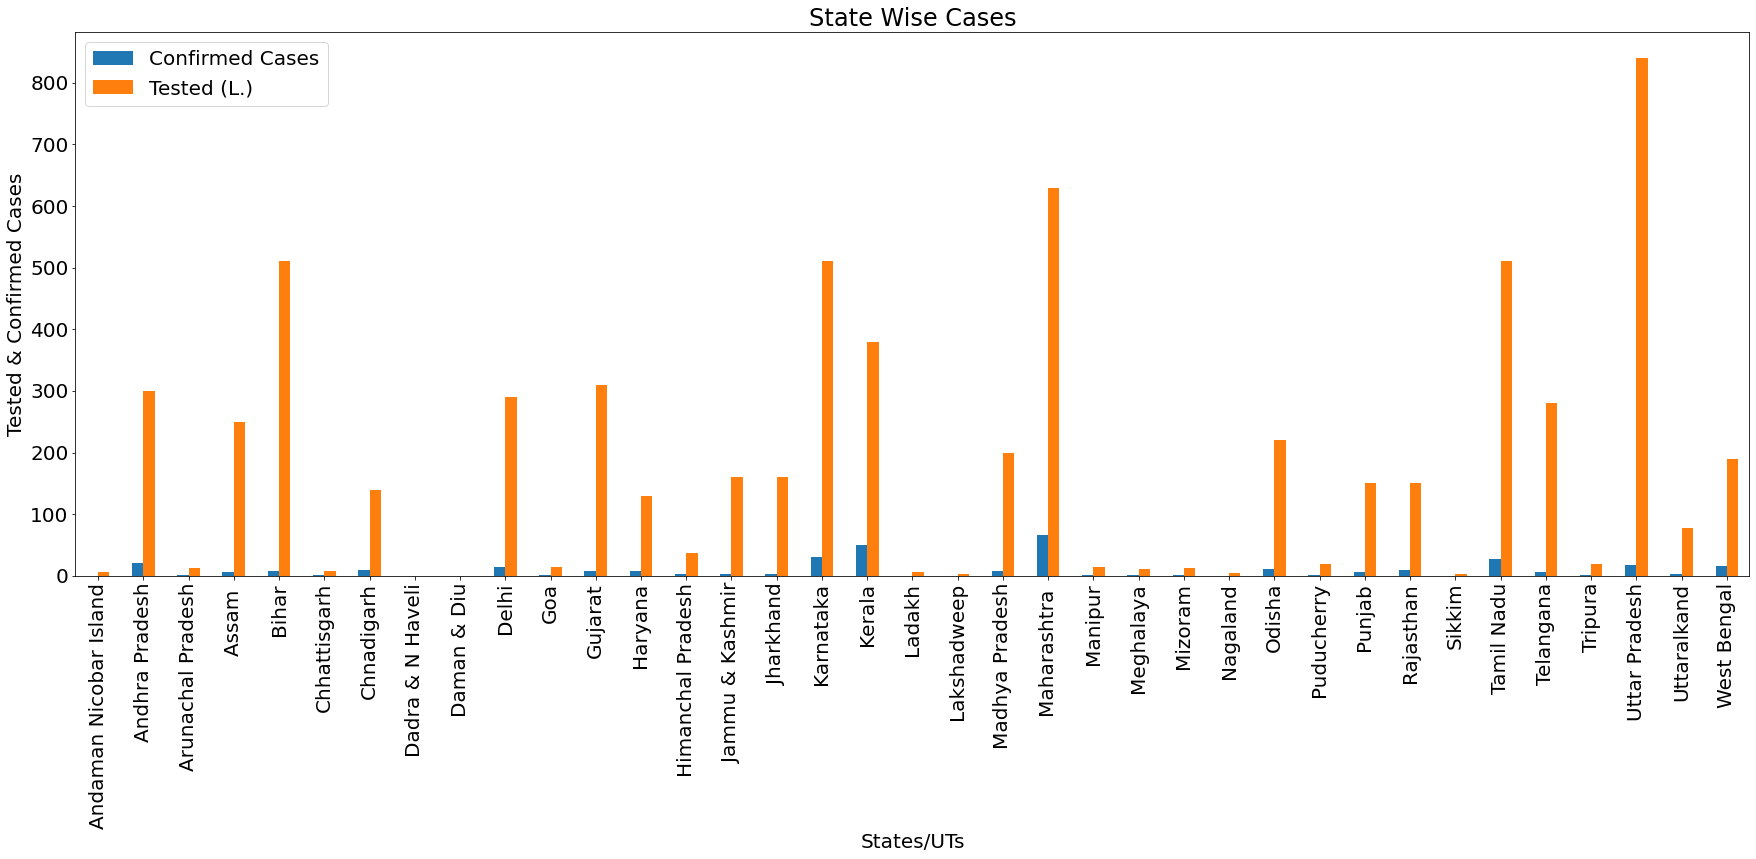

In [18]:
plt.rcParams.update({'font.size': 20})
df5.plot.bar(x='States/UTs',xlabel='States/UTs',ylabel='Tested & Confirmed Cases',title='State Wise Cases',figsize=(30,10))

In [19]:
df5['% of Confirmed Cases']=(df['Confirmed Cases']/df['Tested (L.)']*100)

In [20]:
df5=df5.fillna(0)
df5.isnull().sum()
df5['% of Confirmed Cases']=df5['% of Confirmed Cases'].replace(np.inf, np.nan)
df5['% of Confirmed Cases'].fillna(0)
df5

,States/UTs,Confirmed Cases,Tested (L.),% of Confirmed Cases
0,Andaman Nicobar Island,0.07651,6.0,1.275167
1,Andhra Pradesh,20.66450,300.0,6.888167
2,Arunachal Pradesh,0.55155,11.9,4.634874
3,Assam,6.10645,250.0,2.442580
4,Bihar,7.26098,510.0,1.423722
5,Chhattisgarh,0.65351,7.9,8.272278
6,Chnadigarh,10.06052,140.0,7.186086
7,Dadra & N Haveli,0.10681,0.0,NaN
8,Daman & Diu,0.00000,0.0,0.000000
9,Delhi,14.39870,290.0,4.965069


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'Andaman Nicobar Island'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam '),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chhattisgarh'),
  Text(6, 0, 'Chnadigarh'),
  Text(7, 0, 'Dadra & N Haveli'),
  Text(8, 0, 'Daman & Diu'),
  Text(9, 0, 'Delhi'),
  Text(10, 0, 'Goa'),
  Text(11, 0, 'Gujarat'),
  Text(12, 0, 'Haryana'),
  Text(13, 0, 'Himanchal Pradesh'),
  Text(14, 0, 'Jammu & Kashmir'),
  Text(15, 0, 'Jharkhand'),
  Text(16, 0, 'Karnataka'),
  Text(17, 0, 'Kerala'),
  Text(18, 0, 'Ladakh'),
  Text(19, 0, 'Lakshadweep'),
  Text(20, 0, 'Madhya Pradesh'),
  Text(21, 0, 'Maharashtra '),
  Text(22, 0, 'Manipur'),
  Text(23, 0, 'Meghalaya'),
  Text(24, 0, 'Mizoram'),
  Text(25, 0, 'Nagaland'),
  Text(26, 0, 'Odisha'),
  Text(27, 0, 'Puducherry'),
  Text(28, 0, 'Punjab')

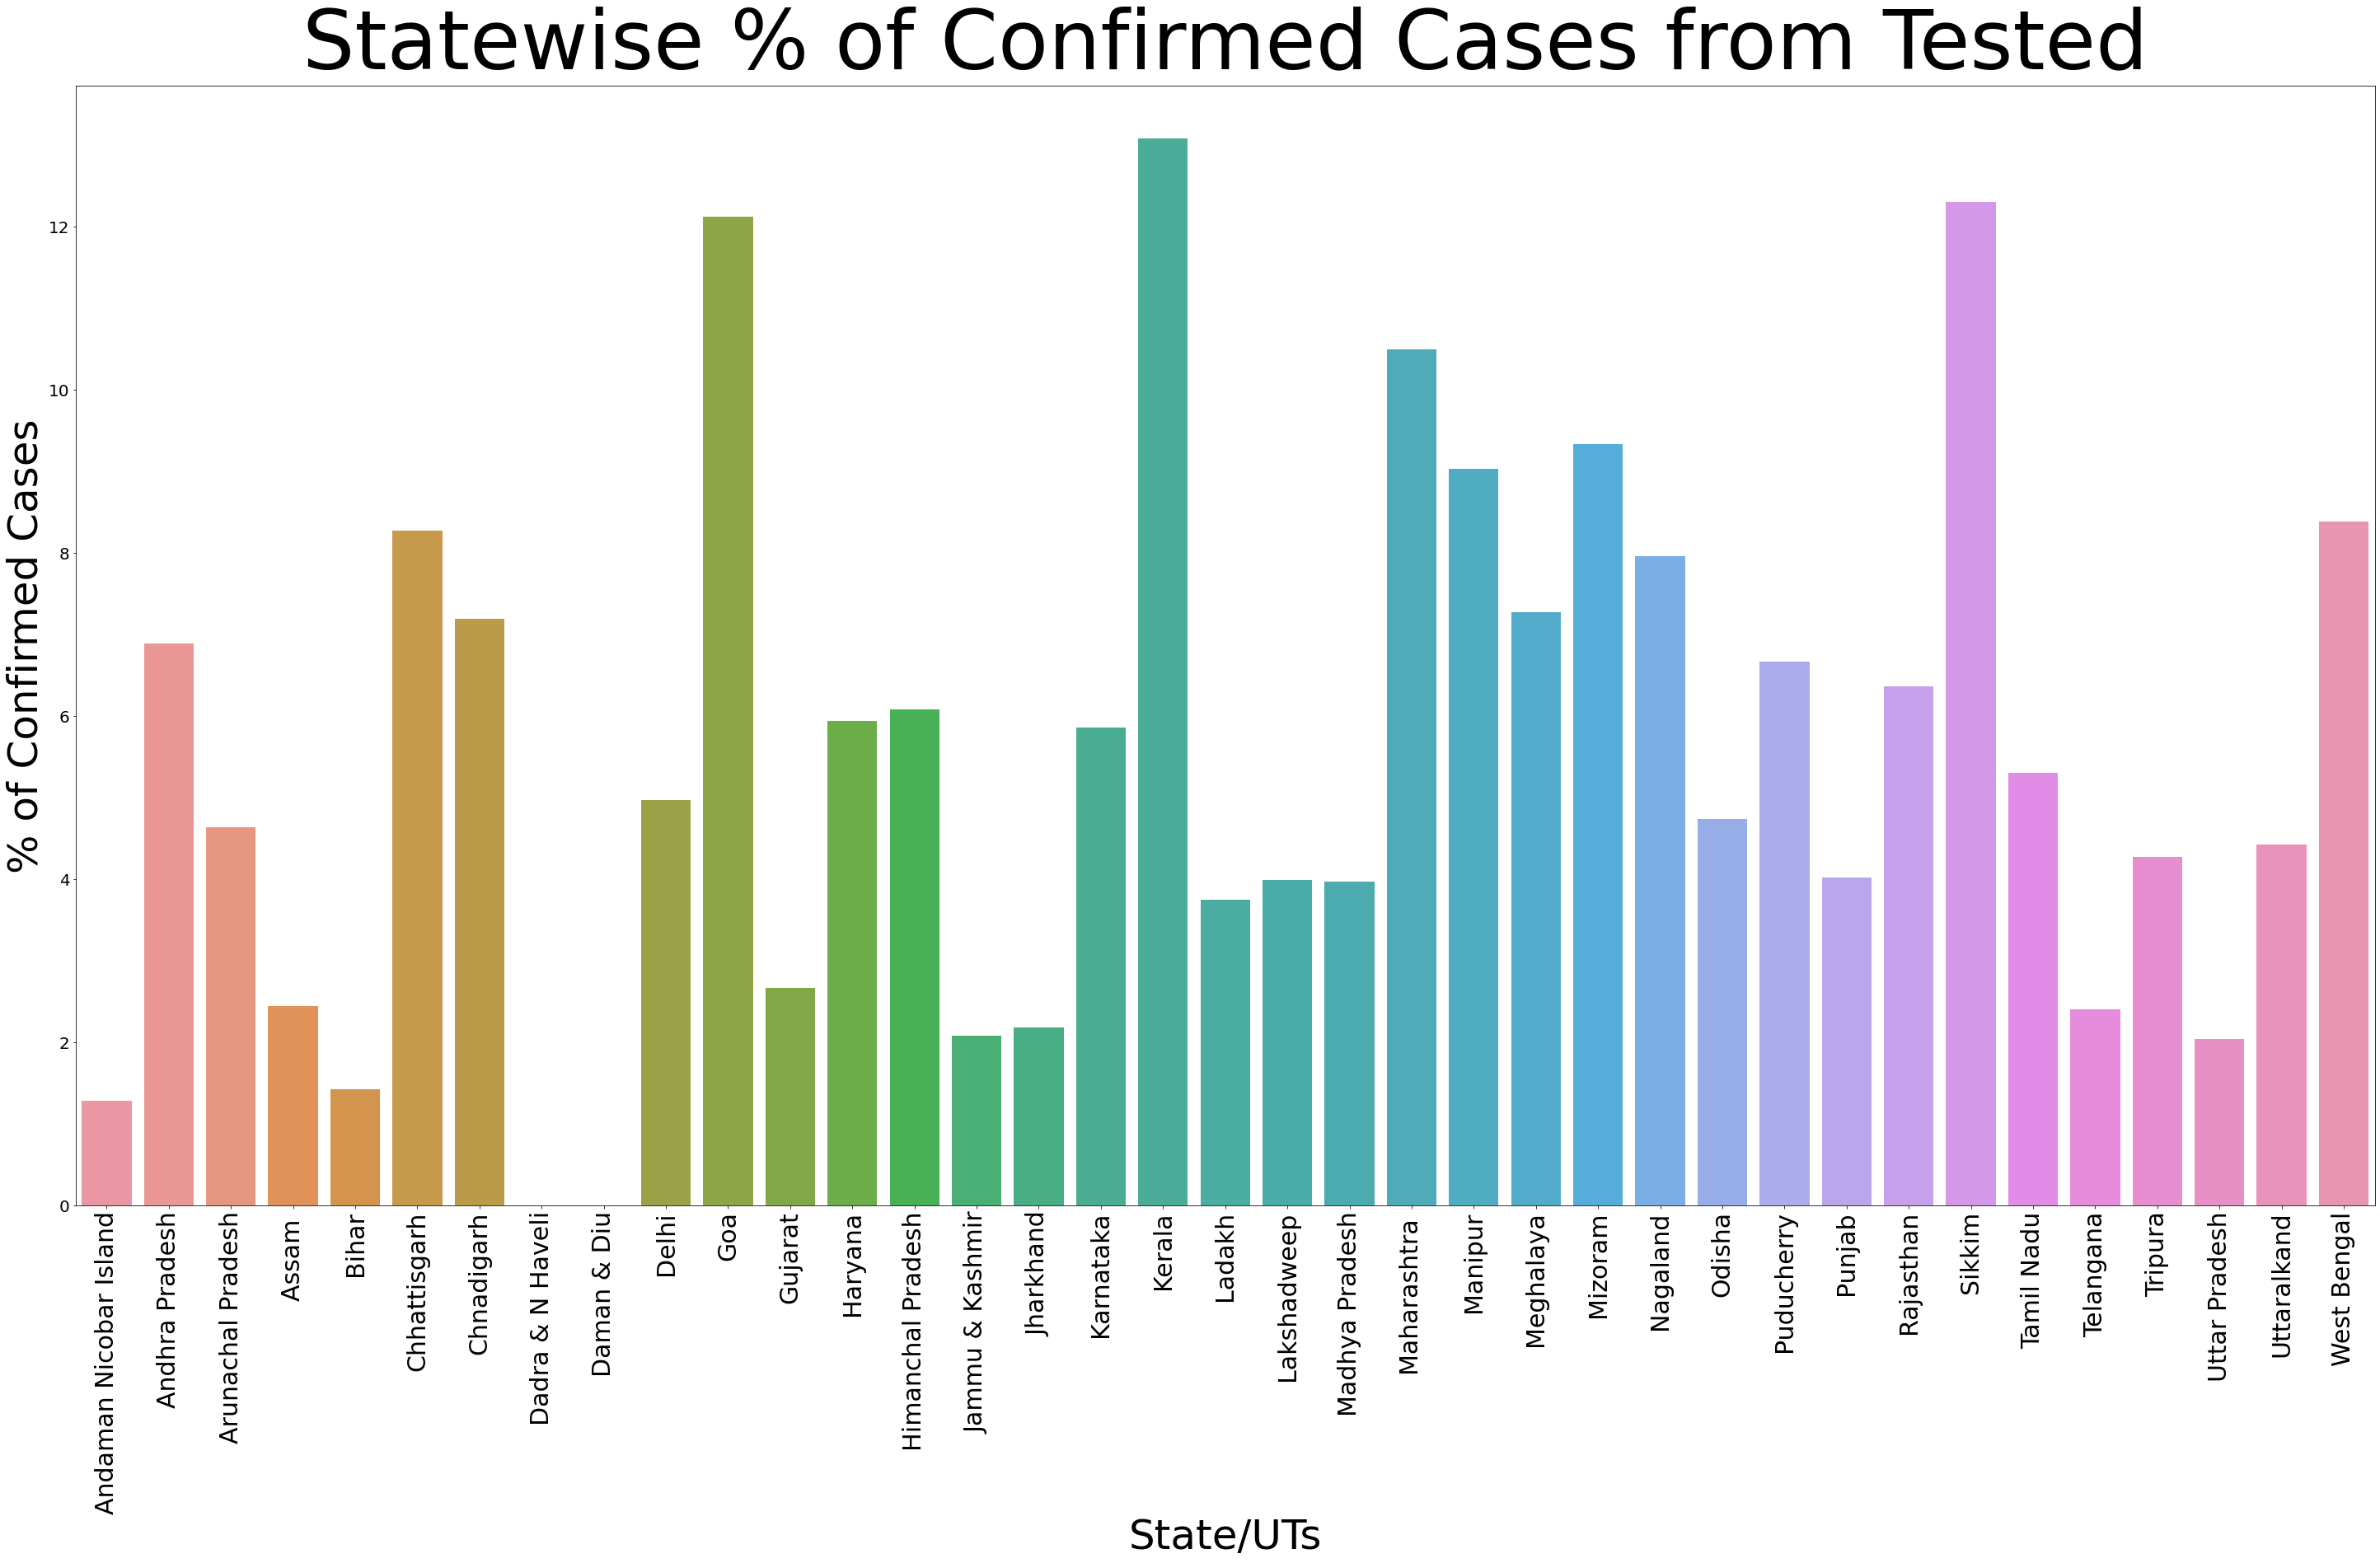

In [21]:
plt.figure(figsize=(50,25))
sns.barplot(x='States/UTs',y='% of Confirmed Cases',data=df5)
plt.title('Statewise % of Confirmed Cases from Tested',fontsize=100)
plt.xlabel('State/UTs',fontsize=50)
plt.ylabel('% of Confirmed Cases',fontsize=50)
plt.xticks(rotation=90,fontsize=30)
#plt.yticks(rotation=90,fontsize=30)

In [22]:
# Converting Deceased in lakhs
df['Deceased ']=df['Deceased ']*(1/100000)
df6=df[['States/UTs','Confirmed Cases','Deceased ']]
df6.head()

,States/UTs,Confirmed Cases,Deceased
0,Andaman Nicobar Island,0.07651,0.00129
1,Andhra Pradesh,20.66450,0.14373
2,Arunachal Pradesh,0.55155,0.00280
3,Assam,6.10645,0.05997
4,Bihar,7.26098,0.09661


<AxesSubplot:title={'center':'Confirmed Cases & Deceased'}, xlabel='States/UTs', ylabel='Confirmed Cases & Deceased'>

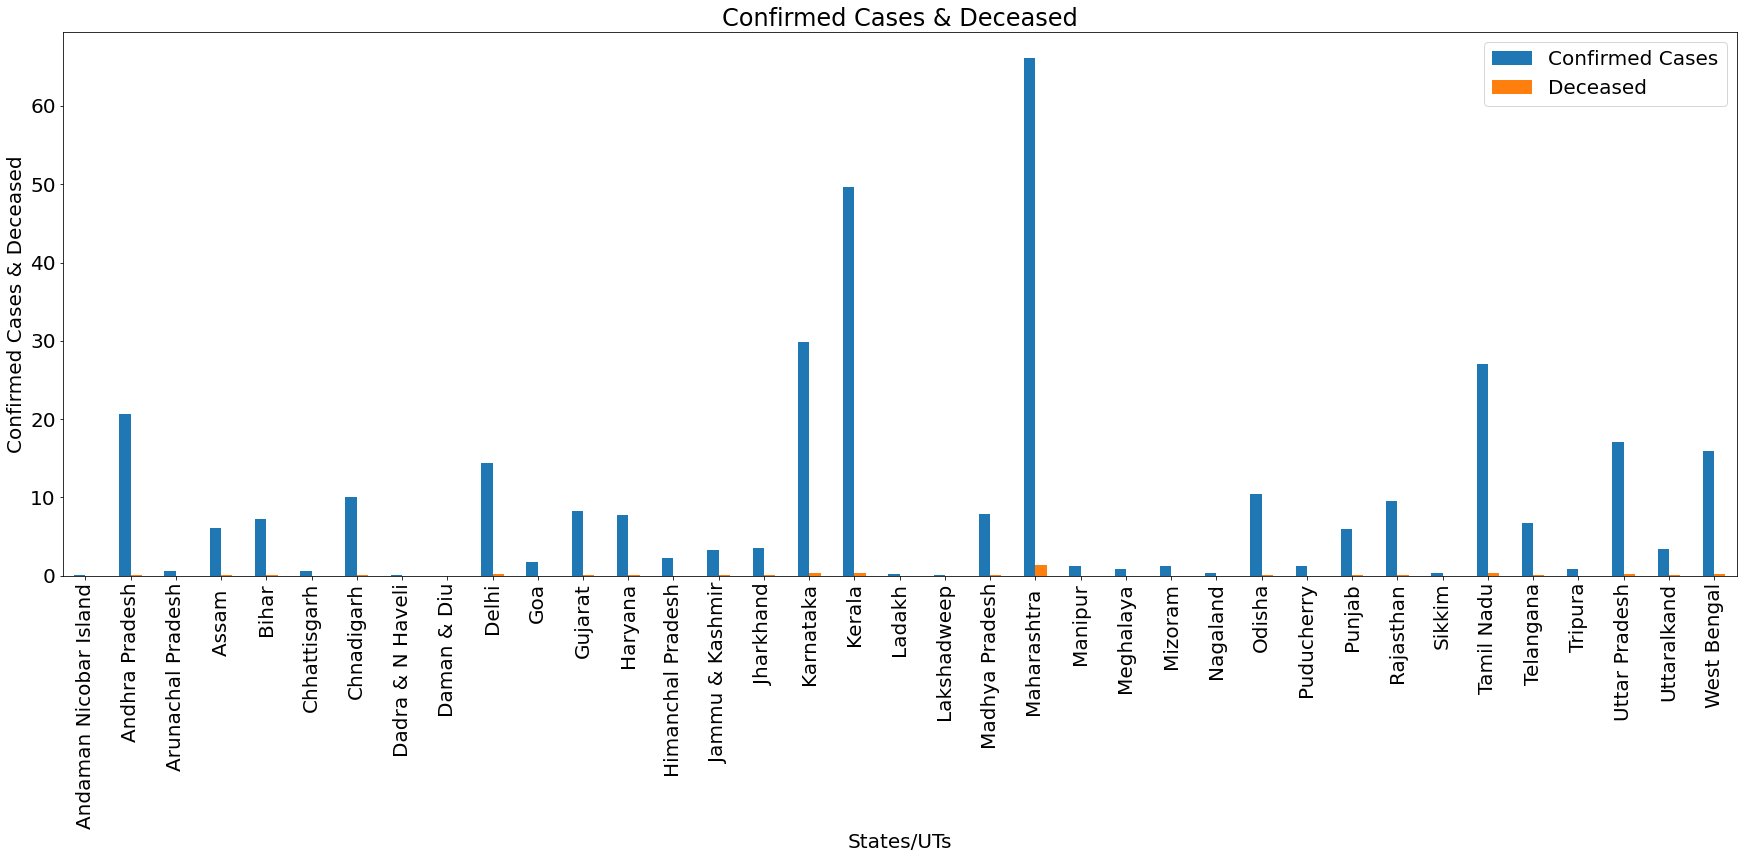

In [23]:
plt.rcParams.update({'font.size': 20})
df6.plot.bar(x='States/UTs',xlabel='States/UTs',ylabel='Confirmed Cases & Deceased',title='Confirmed Cases & Deceased',figsize=(30,10))

In [24]:
df6['% of Deceased from Confirmed Cases']=(df6['Deceased ']/df6['Confirmed Cases']*100)
df6.head(10)

,States/UTs,Confirmed Cases,Deceased,% of Deceased from Confirmed Cases
0,Andaman Nicobar Island,0.07651,0.00129,1.686054
1,Andhra Pradesh,20.66450,0.14373,0.695541
2,Arunachal Pradesh,0.55155,0.00280,0.507660
3,Assam,6.10645,0.05997,0.982076
4,Bihar,7.26098,0.09661,1.330537
5,Chhattisgarh,0.65351,0.00820,1.254763
6,Chnadigarh,10.06052,0.13577,1.349533
7,Dadra & N Haveli,0.10681,0.00004,0.037450
8,Daman & Diu,0.00000,0.00000,NaN
9,Delhi,14.39870,0.25091,1.742588


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'Andaman Nicobar Island'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam '),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chhattisgarh'),
  Text(6, 0, 'Chnadigarh'),
  Text(7, 0, 'Dadra & N Haveli'),
  Text(8, 0, 'Daman & Diu'),
  Text(9, 0, 'Delhi'),
  Text(10, 0, 'Goa'),
  Text(11, 0, 'Gujarat'),
  Text(12, 0, 'Haryana'),
  Text(13, 0, 'Himanchal Pradesh'),
  Text(14, 0, 'Jammu & Kashmir'),
  Text(15, 0, 'Jharkhand'),
  Text(16, 0, 'Karnataka'),
  Text(17, 0, 'Kerala'),
  Text(18, 0, 'Ladakh'),
  Text(19, 0, 'Lakshadweep'),
  Text(20, 0, 'Madhya Pradesh'),
  Text(21, 0, 'Maharashtra '),
  Text(22, 0, 'Manipur'),
  Text(23, 0, 'Meghalaya'),
  Text(24, 0, 'Mizoram'),
  Text(25, 0, 'Nagaland'),
  Text(26, 0, 'Odisha'),
  Text(27, 0, 'Puducherry'),
  Text(28, 0, 'Punjab')

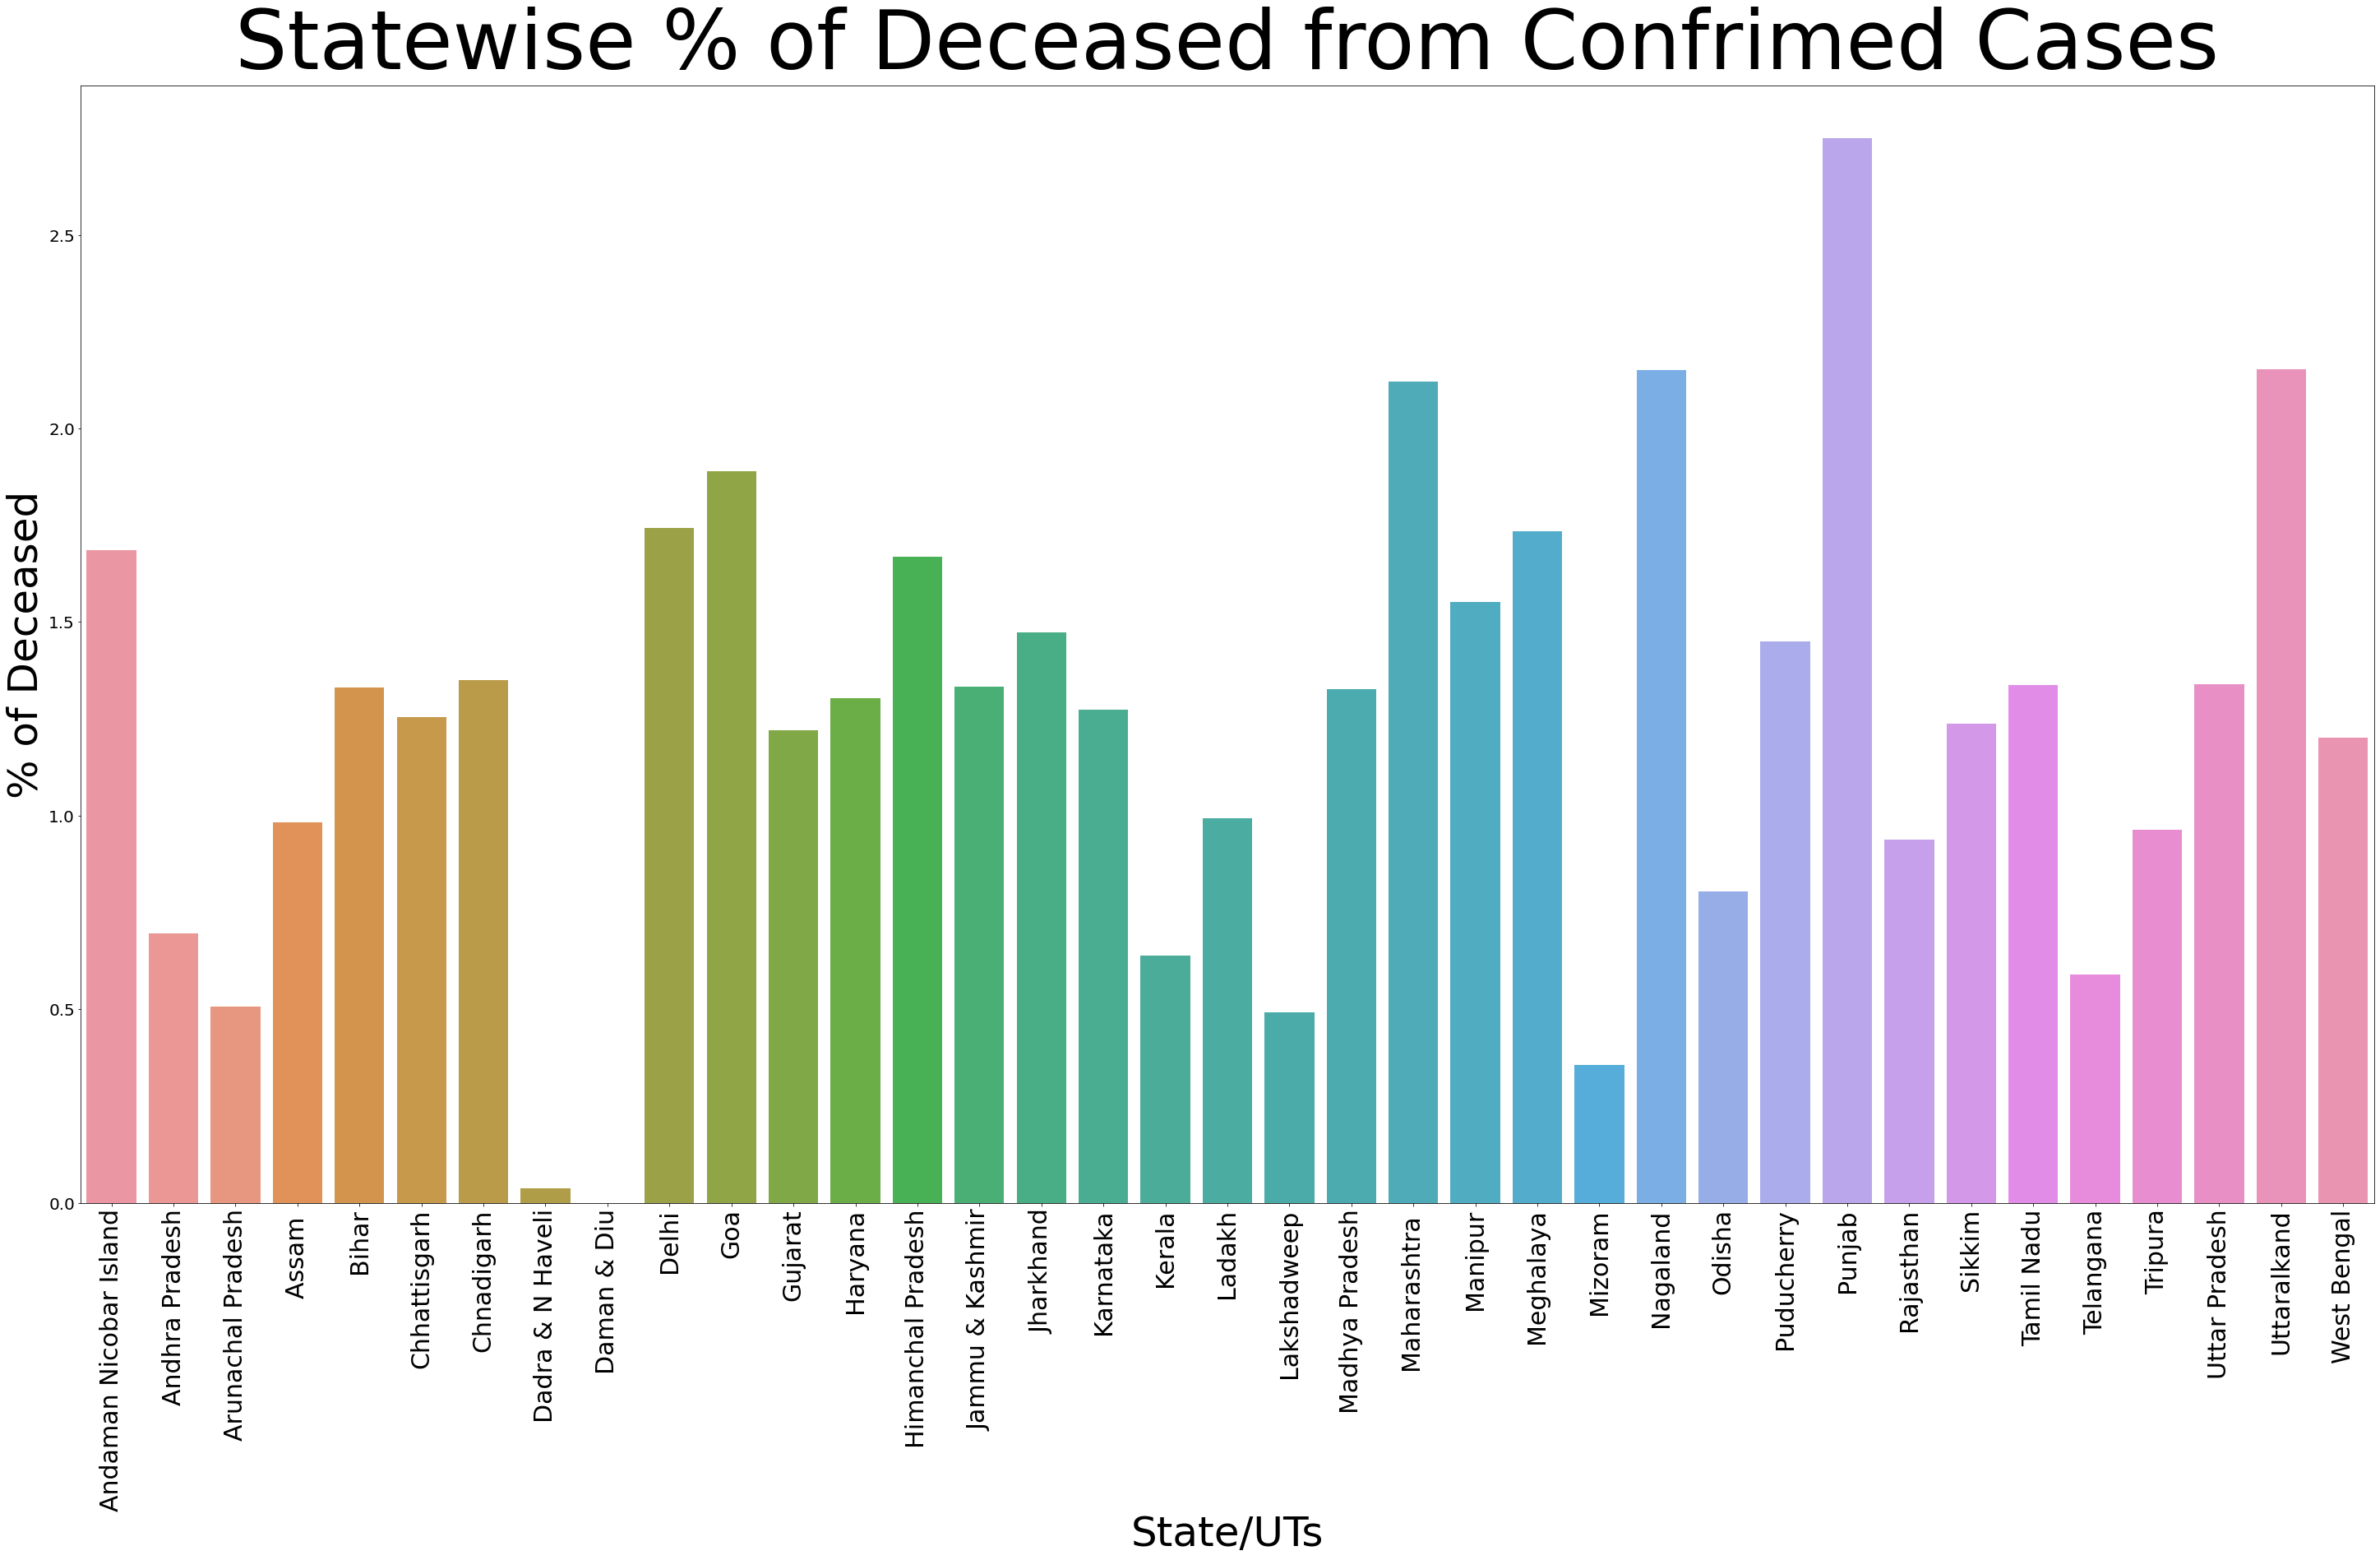

In [25]:
plt.figure(figsize=(50,25))
sns.barplot(x='States/UTs',y='% of Deceased from Confirmed Cases',data=df6)
plt.title('Statewise % of Deceased from Confrimed Cases',fontsize=100)
plt.xlabel('State/UTs',fontsize=50)
plt.ylabel('% of Deceased',fontsize=50)
plt.xticks(rotation=90,fontsize=30)
#plt.yticks(rotation=90,fontsize=30)

In [26]:
df7=df[['States/UTs', 'Vaccinated (At least one dose) (L.)',
       'Fully Vaccinated (L.)', 'Vaccine Doses Administered (L.)']]
df7.head(10)

,States/UTs,Vaccinated (At least one dose) (L.),Fully Vaccinated (L.),Vaccine Doses Administered (L.)
0,Andaman Nicobar Island,2.9,2.0,4.9
1,Andhra Pradesh,330.0,200.0,530.0
2,Arunachal Pradesh,7.7,5.3,13.1
3,Assam,200.0,80.7,280.0
4,Bihar,500.0,180.0,680.0
5,Chhattisgarh,9.3,5.5,14.7
6,Chnadigarh,150.0,73.4,220.0
7,Dadra & N Haveli,6.6,3.7,10.3
8,Daman & Diu,0.0,0.0,0.0
9,Delhi,130.0,74.3,200.0


<AxesSubplot:title={'center':'State Wise Vaccinations'}, xlabel='States/UTs', ylabel='Vaccinated'>

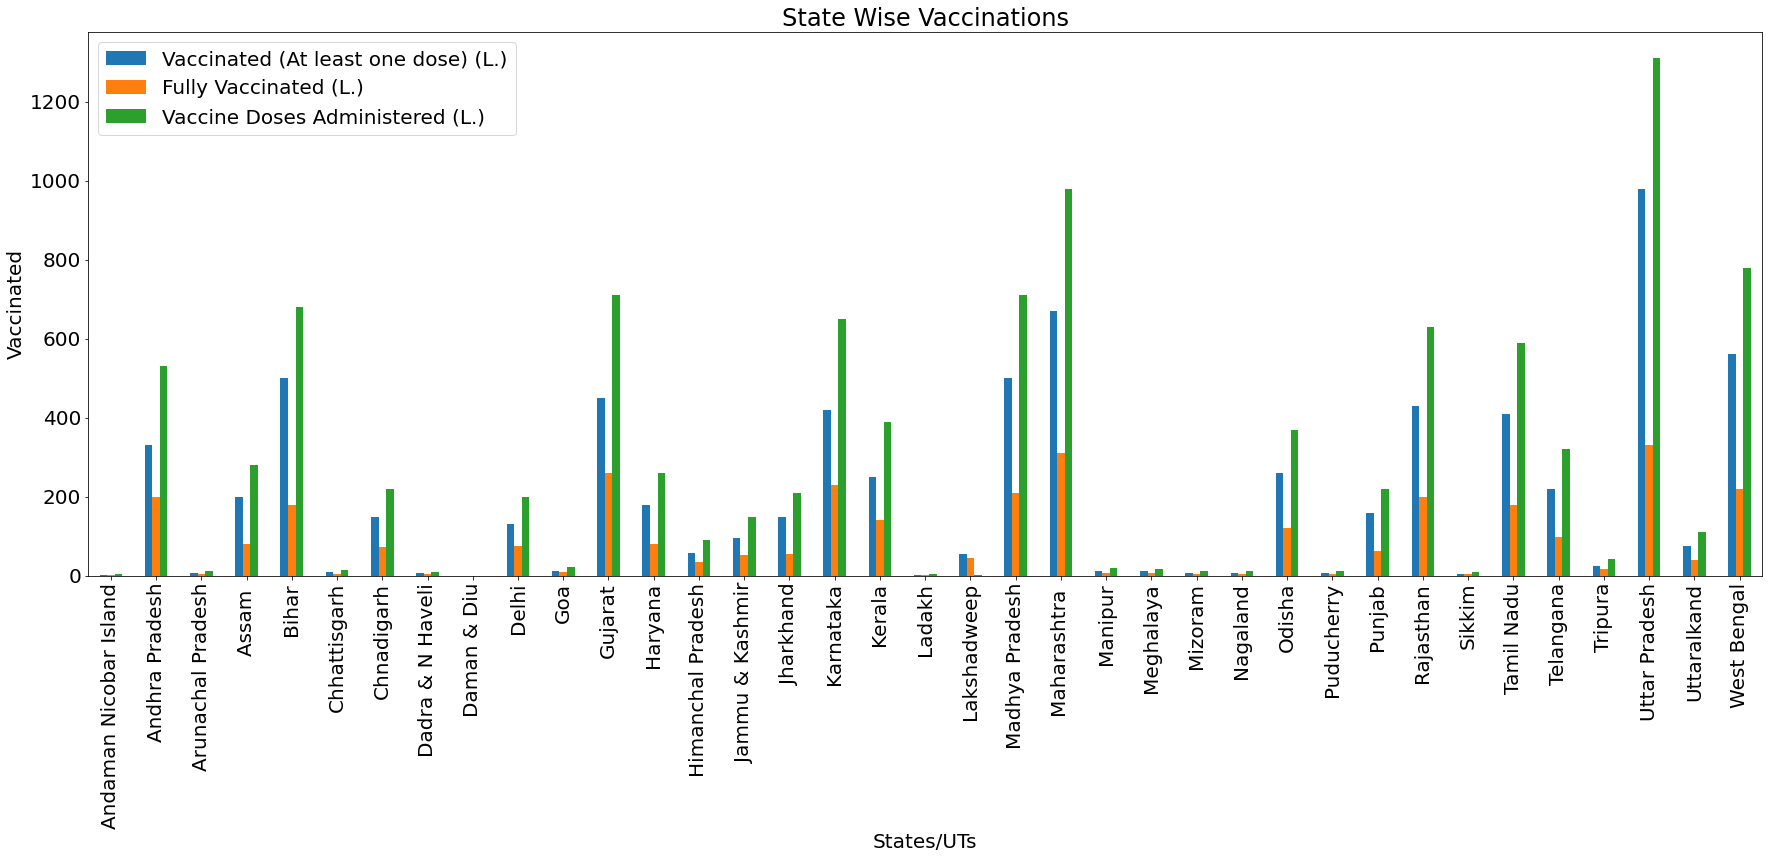

In [27]:
plt.rcParams.update({'font.size': 20})
df7.plot.bar(x='States/UTs',xlabel='States/UTs',ylabel='Vaccinated',title='State Wise Vaccinations',figsize=(30,10))

In [28]:
df7['% of fully vaccinated']=(df['Fully Vaccinated (L.)']/df7['Vaccine Doses Administered (L.)'])*100
df7

,States/UTs,Vaccinated (At least one dose) (L.),Fully Vaccinated (L.),Vaccine Doses Administered (L.),% of fully vaccinated
0,Andaman Nicobar Island,2.9,2.0,4.9,40.816327
1,Andhra Pradesh,330.0,200.0,530.0,37.735849
2,Arunachal Pradesh,7.7,5.3,13.1,40.458015
3,Assam,200.0,80.7,280.0,28.821429
4,Bihar,500.0,180.0,680.0,26.470588
5,Chhattisgarh,9.3,5.5,14.7,37.414966
6,Chnadigarh,150.0,73.4,220.0,33.363636
7,Dadra & N Haveli,6.6,3.7,10.3,35.922330
8,Daman & Diu,0.0,0.0,0.0,NaN
9,Delhi,130.0,74.3,200.0,37.150000


In [29]:
df7.iloc[19]
df7=df7.drop(labels=[19],axis=0)
df7

,States/UTs,Vaccinated (At least one dose) (L.),Fully Vaccinated (L.),Vaccine Doses Administered (L.),% of fully vaccinated
0,Andaman Nicobar Island,2.9,2.0,4.9,40.816327
1,Andhra Pradesh,330.0,200.0,530.0,37.735849
2,Arunachal Pradesh,7.7,5.3,13.1,40.458015
3,Assam,200.0,80.7,280.0,28.821429
4,Bihar,500.0,180.0,680.0,26.470588
5,Chhattisgarh,9.3,5.5,14.7,37.414966
6,Chnadigarh,150.0,73.4,220.0,33.363636
7,Dadra & N Haveli,6.6,3.7,10.3,35.922330
8,Daman & Diu,0.0,0.0,0.0,NaN
9,Delhi,130.0,74.3,200.0,37.150000


(array([ 0., 10., 20., 30., 40., 50.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

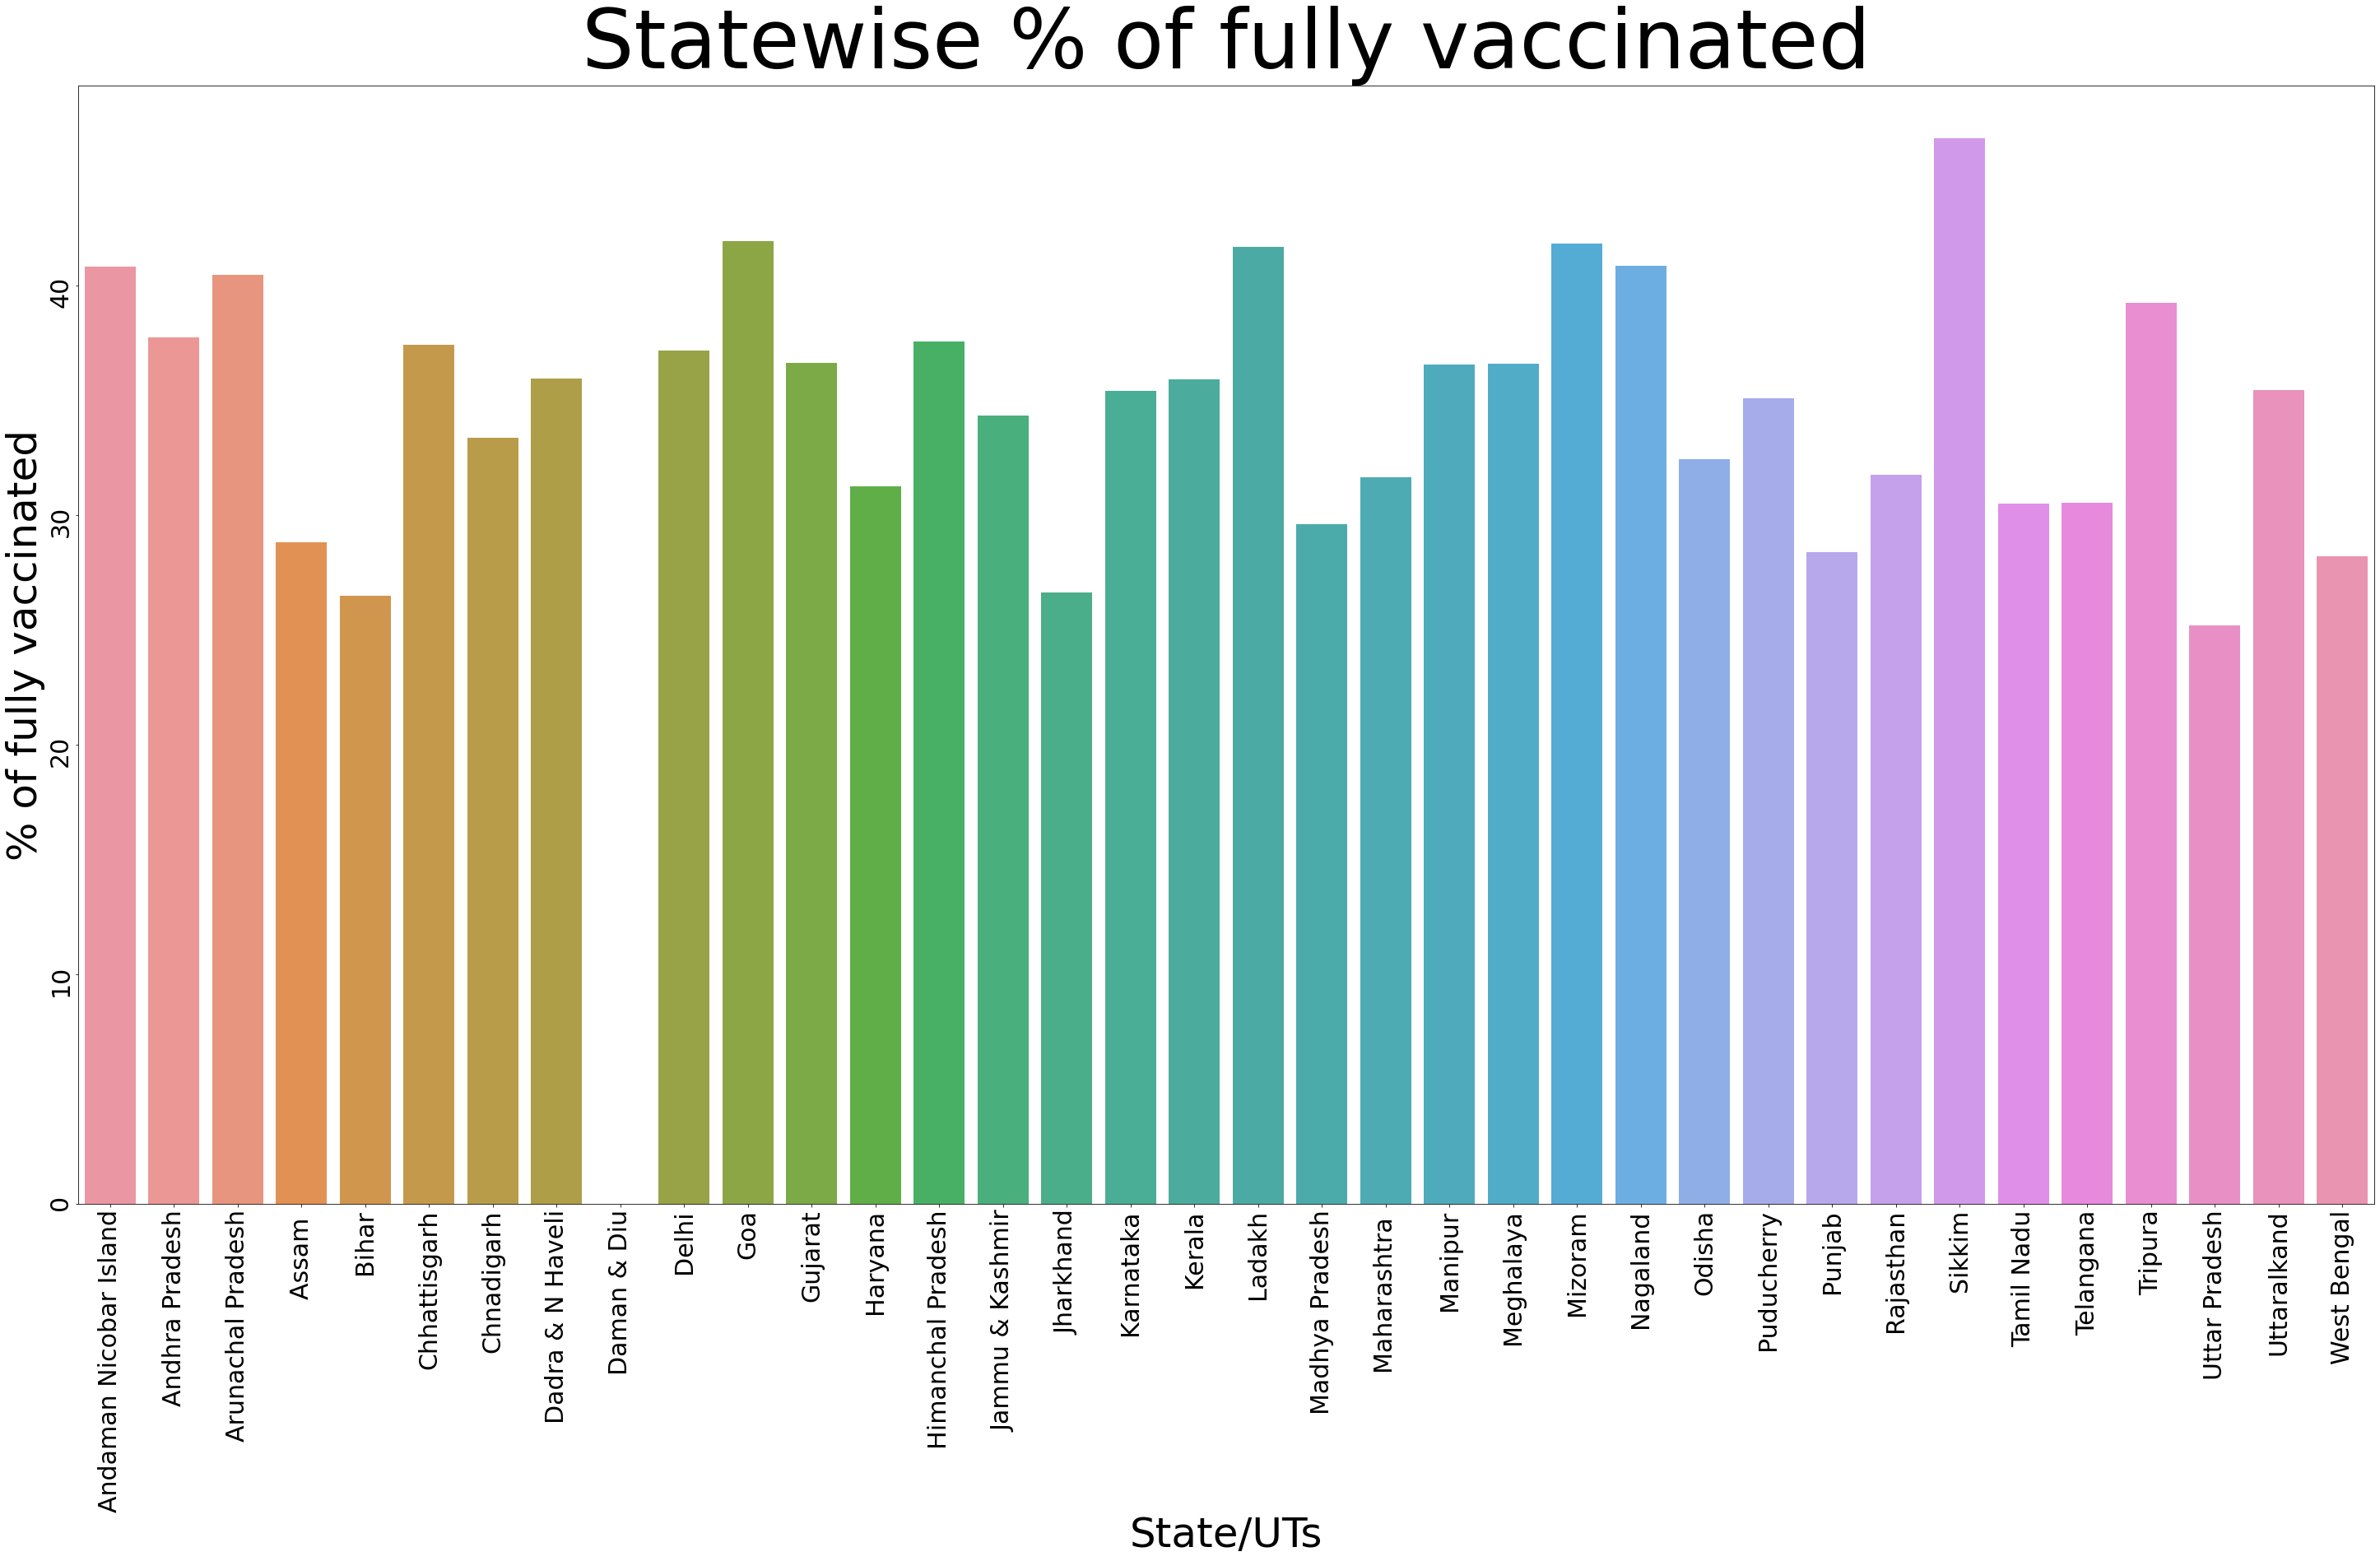

In [30]:
plt.figure(figsize=(50,25))
sns.barplot(x=df7['States/UTs'],y=df7['% of fully vaccinated'])
plt.title('Statewise % of fully vaccinated',fontsize=100)
plt.xlabel('State/UTs',fontsize=50)
plt.ylabel('% of fully vaccinated',fontsize=50)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=90,fontsize=30)

In [31]:
df8=df[['States/UTs','Total number of hospitals (public + private) ','Total number of hospitals beds (public + private) ',
          'Total number of ICU beds (public + private) ','Total number of Ventilators (public + private) ', 'Confirmed Cases',
          'Tested (L.)', 'Vaccinated (At least one dose) (L.)','Fully Vaccinated (L.)','Population (L.)' ,'Deceased ']]
df8.corr()

,Total number of hospitals (public + private),Total number of hospitals beds (public + private),Total number of ICU beds (public + private),Total number of Ventilators (public + private),Confirmed Cases,Tested (L.),Vaccinated (At least one dose) (L.),Fully Vaccinated (L.),Population (L.),Deceased
Total number of hospitals (public + private),1.000000,0.847356,0.847356,0.847414,0.400377,0.769922,0.759939,0.688939,0.795684,0.307392
Total number of hospitals beds (public + private),0.847356,1.000000,1.000000,1.000000,0.742084,0.873392,0.845266,0.849234,0.811490,0.685957
Total number of ICU beds (public + private),0.847356,1.000000,1.000000,1.000000,0.742086,0.873402,0.845269,0.849236,0.811494,0.685965
Total number of Ventilators (public + private),0.847414,1.000000,1.000000,1.000000,0.742057,0.873433,0.845287,0.849230,0.811527,0.685921
Confirmed Cases,0.400377,0.742084,0.742086,0.742057,1.000000,0.726171,0.611590,0.692330,0.532521,0.897398
Tested (L.),0.769922,0.873392,0.873402,0.873433,0.726171,1.000000,0.889879,0.874746,0.888418,0.646721
Vaccinated (At least one dose) (L.),0.759939,0.845266,0.845269,0.845287,0.611590,0.889879,1.000000,0.968496,0.979900,0.566169
Fully Vaccinated (L.),0.688939,0.849234,0.849236,0.849230,0.692330,0.874746,0.968496,1.000000,0.907490,0.621559
Population (L.),0.795684,0.811490,0.811494,0.811527,0.532521,0.888418,0.979900,0.907490,1.000000,0.508041
Deceased,0.307392,0.685957,0.685965,0.685921,0.897398,0.646721,0.566169,0.621559,0.508041,1.000000


There is a strong correlation between                                                                                                          
the number of hospitals beds & the number of Deceased,                                                                                
the number of ICU beds & the number of Deceased,                                                                                
the number of ventilators & the number of Deceased,                                                                                                                                                                                                              the number of confirmed cases & the number of Deceased,                                                                          
the number of tested & the number of Deceased,                                                                                                        
the number of fully vaccinated & the number of Deceased,

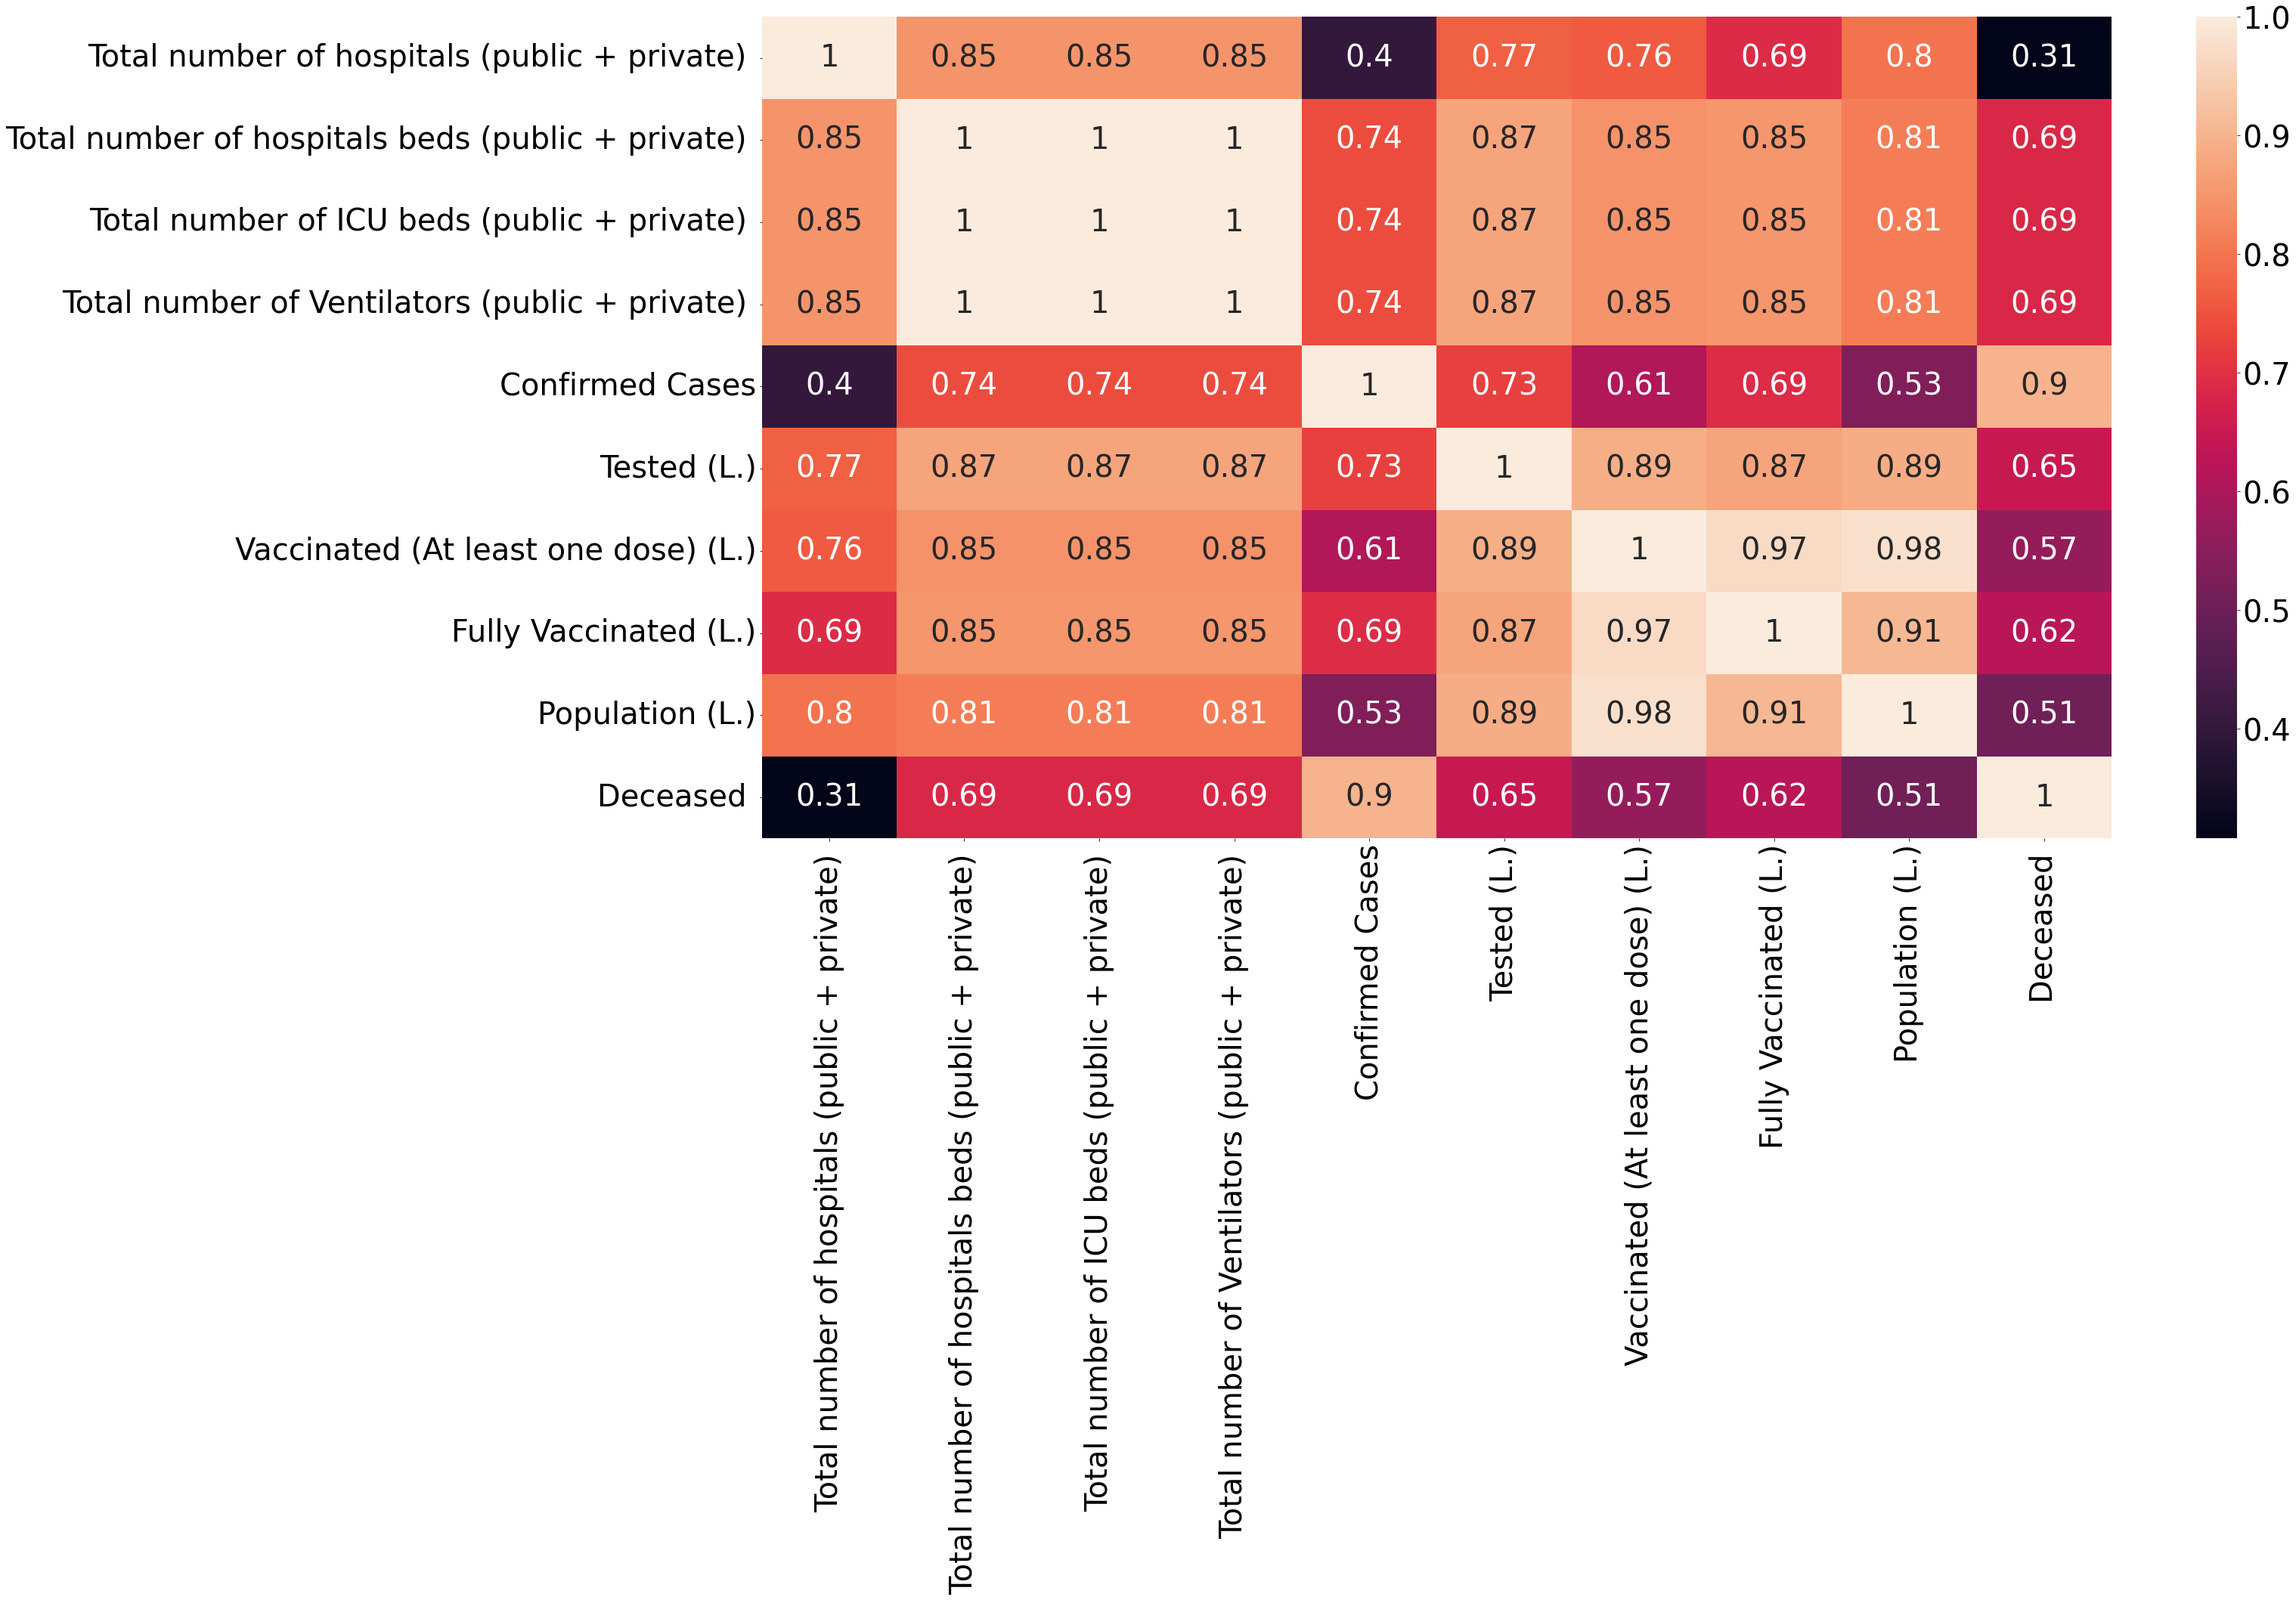

In [32]:
plt.figure(figsize=(40,20))
plt.rcParams.update({'font.size': 40})
sns.heatmap(df8.corr(),annot=True)
plt.show()

In [33]:
# Defining x & y for modelling & subsequent predictions
# Removing those colummns which do not have a strong co-relation with Deceased
x=df8.drop(['States/UTs','Total number of hospitals (public + private) ', 'Vaccinated (At least one dose) (L.)', 'Population (L.)','Deceased '],axis=1)
y=df['Deceased ']
x.head()

,Total number of hospitals beds (public + private),Total number of ICU beds (public + private),Total number of Ventilators (public + private),Confirmed Cases,Tested (L.),Fully Vaccinated (L.)
0,1294,65,32,0.07651,6.0,2.0
1,83230,4162,2080,20.66450,300.0,200.0
2,2624,131,66,0.55155,11.9,5.3
3,24178,1209,605,6.10645,250.0,80.7
4,30857,1543,772,7.26098,510.0,180.0


In [34]:
# Too wide a range of data throughout the dataset. Hence using StandardScaler to bring the data in a uniform range
scaler = StandardScaler()
scaler.fit(x)
x_transformed = scaler.transform(x)
x_transformed

array([[-0.68777559, -0.68772792, -0.68795653, -0.65972821, -0.83855648,
        -0.92174337],
       [ 0.43847478,  0.43860218,  0.43804719,  0.8182552 ,  0.6013061 ,
         1.13832312],
       [-0.66949409, -0.66958348, -0.66926311, -0.62562574, -0.80966128,
        -0.88740893],
       [-0.37322383, -0.37322423, -0.37291741, -0.22684713,  0.35643151,
        -0.10291896],
       [-0.28141771, -0.28140234, -0.28109972, -0.14396502,  1.62977937,
         0.93023559],
       [-0.46597838, -0.46587086, -0.46638451, -0.61830618, -0.82925125,
        -0.88532806],
       [-0.62816141, -0.62807119, -0.62802763,  0.0570101 , -0.18229259,
        -0.17887091],
       [-0.69262775, -0.6926764 , -0.69290479, -0.65755302, -0.86794143,
        -0.90405593],
       [-0.68838039, -0.68827775, -0.68850634, -0.66522076, -0.86794143,
        -0.94255213],
       [-0.16323399, -0.16318854, -0.16289132,  0.36844206,  0.55233118,
        -0.16950697],
       [-0.64255293, -0.64236681, -0.6428724 , -0.

In [35]:
# Now applying the Linear Regression Model since the data in the Deceased column is continious
model=LinearRegression()
model.fit(x_transformed,y)

LinearRegression()

In [36]:
y_predicted=model.predict(x_transformed)
y_predicted

array([-2.24273759e-04,  3.18439797e-01, -2.43706051e-02,  5.15387487e-02,
        4.15754731e-02,  2.94406812e-02,  1.32666783e-01, -1.31666744e-02,
        7.22574055e-03,  1.84010523e-01,  5.07995219e-02,  9.22892713e-02,
        8.80982213e-02,  1.68185961e-02,  2.48478875e-02,  2.84987170e-02,
        4.64605967e-01,  7.00663580e-01, -1.63178984e-02, -3.69296356e-02,
        9.59009786e-02,  1.00187060e+00, -2.66945301e-02, -1.31811046e-02,
        1.24104037e-02, -1.54047761e-02,  1.44690079e-01, -2.30878965e-02,
        8.75219356e-02,  1.56789846e-01,  2.20215484e-03,  4.11187157e-01,
        9.73973411e-02, -2.62743600e-02,  2.52643052e-01,  7.29970360e-02,
        2.13221665e-01])

In [37]:
accuracy=model.score(x_transformed,y)
accuracy

0.813567635733345